<a href="https://colab.research.google.com/github/min0j98/mobis_aistudy_2023/blob/master/DL_03_Wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 라이브러리 & 함수 로드



In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
# 데이터 처리 및 그래프 관련 함수
import matplotlib.pyplot as plt
import seaborn as sns

## 학습 데이터 로드

In [ ]:
# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 6.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]  #레드와인: 1, 화이트와인: 0

## 3. 데이터 전처리

In [ ]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


## 4. 딥러닝 모델 구조 설계 & 5. 모델 학습

In [ ]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
# history=model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.25) # 0.8 x 0.25 = 0.2

# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"
# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
61/61 [==============================] - 4s 17ms/step - loss: 2.2869 - accuracy: 0.6449 - val_loss: 0.5336 - val_accuracy: 0.7338
Epoch 2/500
61/61 [===========================

## 6. 학습 성능 검토

In [ ]:
#history에 저장된 학습 결과를 확인해보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,2.286864,0.644855,0.533571,0.733846
1,0.473534,0.786502,0.403376,0.827692
2,0.364961,0.853990,0.326107,0.873077
3,0.298570,0.889659,0.280425,0.892308
4,0.259135,0.905312,0.249529,0.916923
...,...,...,...,...
341,0.042094,0.985630,0.038962,0.991538
342,0.038488,0.988453,0.057219,0.981538
343,0.043897,0.986400,0.038962,0.991538
344,0.046038,0.984604,0.042298,0.986923


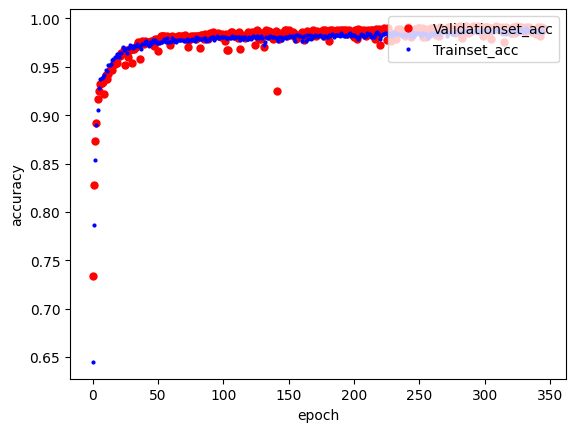

In [ ]:
#history에 저장된 학습 결과를 확인해보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

# y_vloss에 validation 데이터셋의 오차를 저장합니다.
y_valacc = hist_df['val_accuracy']

# y_loss에 train 데이터셋의 오차를 저장합니다.
y_acc = hist_df['accuracy']

# x값을 지정하고 validation 데이터셋의 오차를 빨간색으로, train 데이터셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_valacc, "o", c="red", markersize=5, label="Validationset_acc")
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label="Trainset_acc")

plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

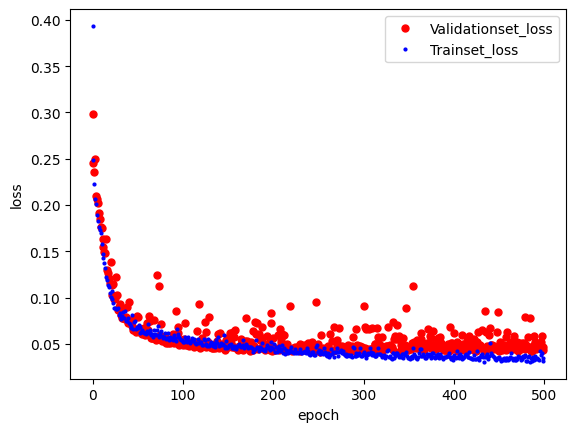

In [ ]:
#history에 저장된 학습 결과를 확인해보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

# y_vloss에 validation 데이터셋의 오차를 저장합니다.
y_valloss = hist_df['val_loss']

# y_loss에 train 데이터셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x값을 지정하고 validation 데이터셋의 오차를 빨간색으로, train 데이터셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_valloss, "o", c="red", markersize=5, label="Validationset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9946
Test accuracy: 0.994615375995636


In [24]:
y_test_pred_ = model.predict(X_test)

41/41 [==============================] - 0s 1ms/step


In [25]:
y_test_pred = []
for i in range(len(y_test_pred_)):
  if y_test_pred_[i]>=0.5:
    eachpred = 1
  else:
    eachpred = 0
  y_test_pred.append(eachpred)
y_test_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,


In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[957  14]
 [  8 321]]


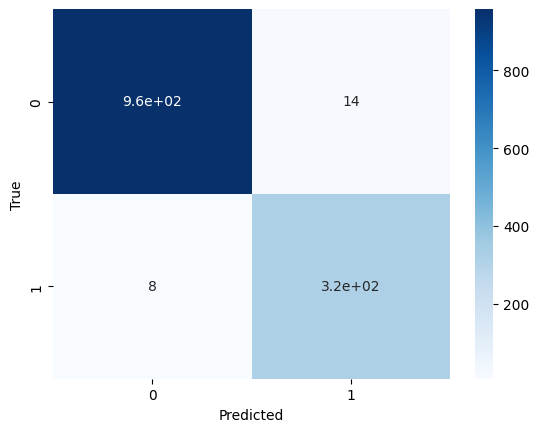

In [32]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
print("f1_score:", f1_score(y_test, y_test_pred,average="micro"))  #micro, weighted, macro ...


f1_score: 0.9830769230769231
